In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.edgecolor'] = 'k'
import numpy as np

In [2]:
ik = []
wbb = []
hbb = []
tbb = []
for i in range(1, 11):
    data = np.loadtxt('../../output/simulation/slipids_nb{}.txt'.format(i), unpack=True)
    data = data[:, :71]
    for j in range(0, data.shape[0], 4):
        ik.append(data[j])
        wbb.append(data[j+1])
        hbb.append(data[j+2])
        tbb.append(data[j+3])

In [3]:
ikc = np.asarray(ik)
wbc = np.asarray(wbb)
hbc = np.asarray(hbb)
tbc = np.asarray(tbb)

In [4]:
print(ikc.shape)

(501, 71)


In [5]:
ikd = ikc.mean(axis=0)
wbc = np.asarray(wbb)
hbc = np.asarray(hbb)
tbc = np.asarray(tbb)
wph  = wbc / hbc

/home/arm61/miniconda3/envs/sim_vs_trad/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/home/arm61/miniconda3/envs/sim_vs_trad/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


In [6]:
wph.shape

(501, 71)

In [27]:
dh_tot = np.array([])
wph_tot = np.array([])
total_head = np.sum(hbc, axis=1)

dh = np.zeros(wbc.shape[0])
e = np.zeros(wbc.shape[0])
s = np.zeros(wbc.shape[0])

bin_width = 1

for j in range(0, wbc.shape[0]):
    summing = 0
    start = 0
    end = 0
    for i in range(0, wbc.shape[1]):
        if summing > total_head[j] * 0.05:
            start = i * bin_width
            break
        else:
            summing += hbc[j, i]

    summing = 0
    for i in range(0, wbc.shape[1]):
        if summing > total_head[j] * 0.95:
            end = i * bin_width
            break
        else:
            summing += hbc[j, i]

    dh[j] = end-start
    e[j] = end
    s[j] = start
print(e, s)
print(len(e))
en = int(np.round(e.mean()))
st = int(np.round(s.mean()))

[36. 36. 36. 36. 36. 35. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36.
 36. 36. 36. 36. 36. 36. 36. 37. 36. 37. 36. 36. 36. 36. 36. 36. 36. 36.
 35. 36. 36. 36. 36. 36. 35. 36. 36. 36. 36. 36. 36. 35. 36. 35. 36. 36.
 36. 35. 35. 35. 36. 35. 36. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 36. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 36. 35.
 35. 36. 36. 35. 36. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 34. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 35. 35. 35. 34. 34. 35. 35. 35. 35. 34. 35.
 34. 34. 35. 35. 35. 35. 35. 34. 34. 35. 35. 35. 35. 35. 35. 35. 35. 35.
 35. 35. 35. 35. 35. 34. 35. 35. 35. 35. 34. 34. 35

In [39]:
wph_tot = np.array([])
for i in range(0, wph.shape[0]):
    wph_tot = np.append(wph_tot, wph[i][np.where((ikd < e[i]) & (ikd > s[i]))])

In [40]:
wph[np.where(hbc == 0)] = 0

In [48]:
from scipy.stats.mstats import mquantiles
a = mquantiles(wph_tot, [0.025, 0.5, 0.975])
file_out = open('../../output/simulation/{}_{}.txt'.format('wph', '30'), 'w')
k = [a[1], a[1] - a[0], a[2] - a[1]]
q = '{:.2f}'.format(k[0])
e = '{:.2f}'.format(k[1])
w = '{:.2f}'.format(k[2])
file_out.write('$' + str(q) + '^{+' + str(w) + '}_{-' + str(e) + '}$')
file_out.close()

In [49]:
file_out = open('../../output/simulation/{}_{}.txt'.format('wph', '30'), 'w')
file_out.write('$' + str(wph_tot.mean()) + '$')
file_out.close()

In [115]:
sad = np.logspace(0, np.log2(wph_tot.max()), 400, base=2)

In [116]:
a = np.histogram(wph_tot, bins=sad)

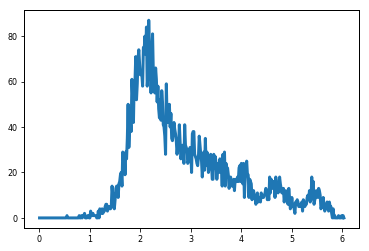

In [119]:
y = a[0]
x = a[1][:-1] + 0.5 * (a[1][1] - a[1][0])
plt.plot(np.log2(x), y)
#plt.xscale('log')

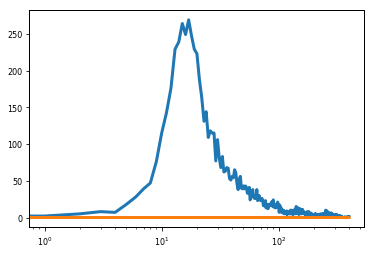

In [93]:
from scipy.optimize import curve_fit
from scipy.stats import lognorm
shape, loc, scale = lognorm.fit(y)
plt.plot(y)
plt.plot(lognorm.pdf(x, shape, loc, scale))
plt.xscale('log')

In [ ]:
plt.figure(figsize=(5, 25/6))
fig, ax = plt.subplots()
ax1 = ax.twinx()
for i in range(wph.shape[0]):
    ax.plot(ikd, wph[i], c='#0173B2', alpha=0.01, marker='.', ls='')
av_wph = wph.mean(axis=0)
ax.plot(ikd[np.where(av_wph != 0)], np.trim_zeros(av_wph), c='#0173B2', marker='', ls='-')
ax1.set_ylim([0, 3.6])
for i in range(wph.shape[0]):
    ax1.plot(ikd, wbc[i] * 100, c='#DE8F05', alpha=0.005)
    ax.plot(ikd, hbc[i] *10000, c='#029E73', alpha=0.005)
    ax.plot(ikd, tbc[i] *10000, c='#D55E00', alpha=0.005)
#j = hb * 10000
#ax.fill_between(np.arange(st, en), 0, j[st+60:en+60], facecolor='#CC78BC', alpha=0.5)
ax.set_ylim([0, 25])
ax.set_xlim([-20, 70])
ax.set_xlabel(r'$z$/Å')
ax.set_ylabel(r'Number Density Lipid/$\times 10 ^{-4}$Å$^{-3}$'
              '\n'
              r'wph')
ax1.set_ylabel(r'Number Density Water/$5\times 10 ^{-2}$Å$^{-3}$')
plt.savefig('../../reports/figures/number_density.pdf')